In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyccl
import sys
sys.path.append("../..")
import txpipe.utils.theory
import h5py
import healpy as hp
import scipy.interpolate
import sacc


def load_tracers(filename, nbin_source, nbin_lens):
    import sacc
    f = h5py.File(filename, "r")
    tracers = {}
    for i in range(nbin_source):
        name = f"source_{i}"
        z = f['n_of_z/source/z'][:]
        Nz = f[f'n_of_z/source/bin_{i}'][:]
        T = sacc.BaseTracer.make("NZ", name, z, Nz)
        tracers[name] = T

    for i in range(nbin_lens):
        name = f"lens_{i}"
        z = f['n_of_z/lens/z'][:]
        Nz = f[f'n_of_z/lens/bin_{i}'][:]
        T = sacc.BaseTracer.make("NZ", name, z, Nz)
        tracers[name] = T
    return tracers

In [3]:
import txpipe.utils.theory


In [4]:
nbin_source = 4
nbin_lens = 1
tracers = load_tracers('../../data/cosmodc2/outputs/photoz_stack.hdf5', nbin_source, nbin_lens)


In [5]:
pixwin = hp.pixwin(1024, pol=True)[0]
ell_pixwin = np.arange(len(pixwin))
pixwin_spline = scipy.interpolate.UnivariateSpline(ell_pixwin, pixwin)

In [6]:
theory_cl, theory_xi = txpipe.utils.theory.theory_3x2pt("../../data/fiducial_cosmology.yml", tracers, nbin_source, nbin_lens, fourier=False)


../../txpipe/utils/theory.py:58: UserWarning: Not using galaxy bias in fiducial theory density spectra
  warnings.warn("Not using galaxy bias in fiducial theory density spectra")


In [7]:
data = sacc.Sacc.load_fits("../../data/cosmodc2/outputs/twopoint_data_fourier_flip.sacc")

/Users/jaz/src/sacc/sacc/sacc.py:352: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you should check the tracer order?")


Text(0.5, 0.98, 'EE C_ell with NaMaster on CosmoDC2 + Mock errors, true n(z)')

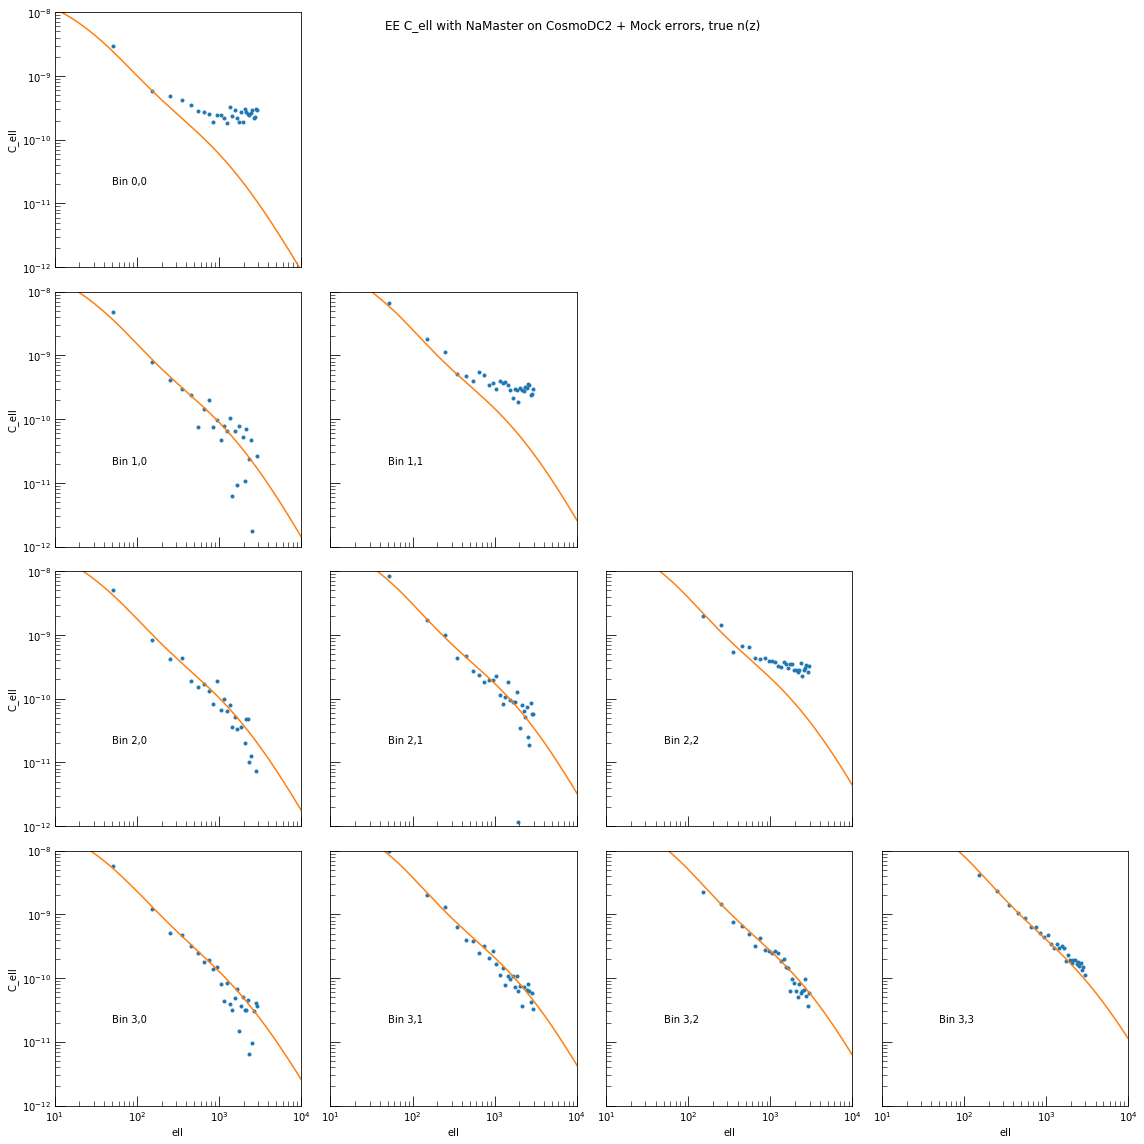

In [8]:
fig, axes = plt.subplots(nrows=nbin_source, ncols=nbin_source, sharey=True, sharex=True, figsize=(16,16))
for i in range(nbin_source):
    for j in range(nbin_source):
        ax = axes[i,j] #subplot2grid((nbin_source, nbin_source), (i,j))
        ell, cl = data.get_ell_cl('galaxy_shear_cl_ee', f'source_{i}', f'source_{j}')
        if len(ell)==0:
            fig.delaxes(ax)
            continue
            
        ax.loglog(ell, cl  / pixwin_spline(ell),  '.')
        ax.loglog(theory_cl['ell'][2:], theory_cl[(i, j, 0)][2:])
        if i == nbin_source - 1:
            ax.set_xlabel("ell")
        if j == 0:
            ax.set_ylabel("C_ell") 
        ax.text(50, 2e-11, f'Bin {i},{j}')
        ax.tick_params(which='both', direction='in')
        ax.tick_params(which='major', length=10)
        ax.tick_params(which='minor', length=5)
ax.set_xlim(10,1e4)
ax.set_ylim(1e-12,1e-8)
plt.tight_layout()
fig.suptitle("EE C_ell with NaMaster on CosmoDC2 + Mock errors, true n(z)")

In [9]:
data2 = sacc.Sacc.load_fits("../../data/cosmodc2/outputs/twopoint_data_flip.sacc")


Text(0.5, 0.98, 'xi_plus with TreeCorr on CosmoDC2 + Mock errors, true n(z)')

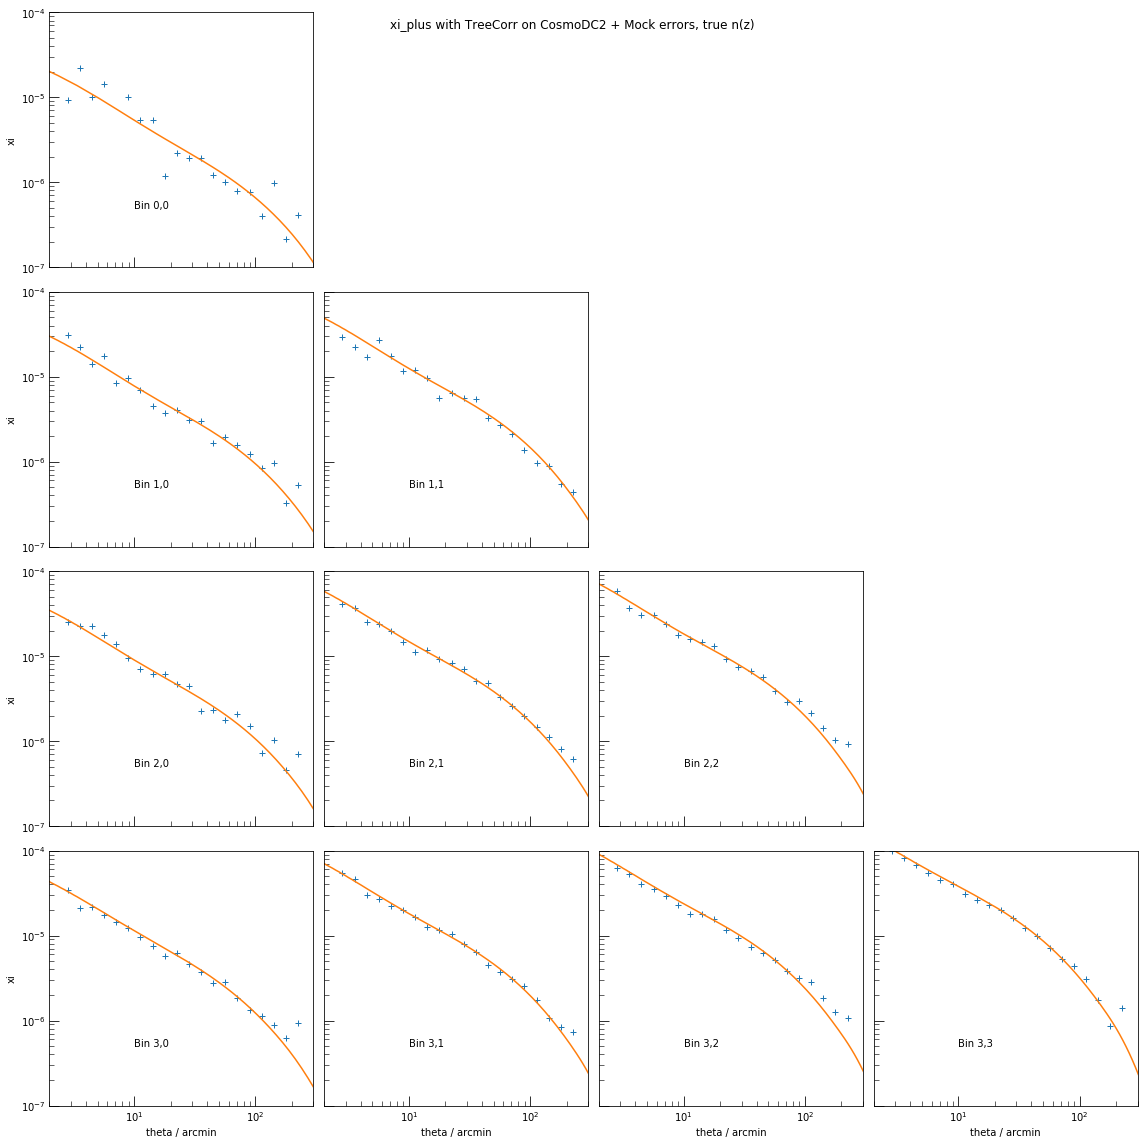

In [10]:
fig, axes = plt.subplots(nrows=nbin_source, ncols=nbin_source, sharey=True, sharex=True, figsize=(16,16))
for i in range(nbin_source):
    for j in range(nbin_source):
        theta, xi = data2.get_theta_xi('galaxy_shear_xi_plus', f'source_{i}', f'source_{j}')
        ax = axes[i,j]
        if len(theta)==0:
            fig.delaxes(ax)
            continue
        ax.loglog(theta, xi, '+')
        ax.loglog(theory_xi['theta'], theory_xi[(i, j, 0)][0])
        ax.text(10,5e-7, f'Bin {i},{j}')
        if i == nbin_source - 1:
            ax.set_xlabel("theta / arcmin")
        if j == 0:
            ax.set_ylabel("xi")        
        ax.tick_params(which='both', direction='in')
        ax.tick_params(which='major', length=10)
        ax.tick_params(which='minor', length=5)
ax.set_xlim(2.0, 300)
ax.set_ylim(1e-7,1e-4)
plt.tight_layout()
fig.suptitle("xi_plus with TreeCorr on CosmoDC2 + Mock errors, true n(z)")

Text(0.5, 0.98, 'xi_minus with TreeCorr on CosmoDC2 + Mock errors, true n(z)')

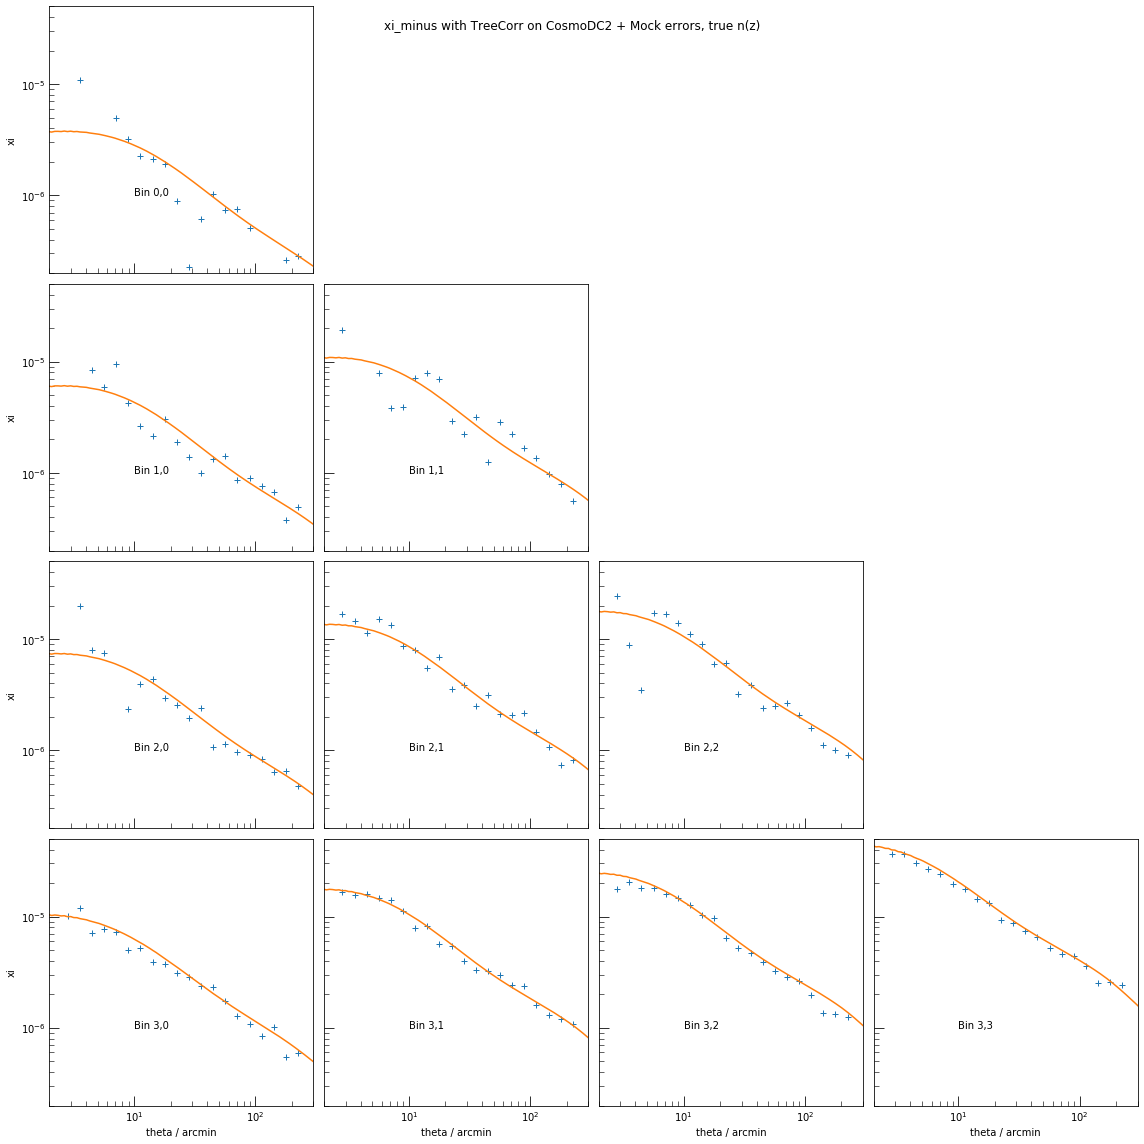

In [11]:
fig, axes = plt.subplots(nrows=nbin_source, ncols=nbin_source, sharey=True, sharex=True, figsize=(16,16))
for i in range(nbin_source):
    for j in range(nbin_source):
        theta, xi = data2.get_theta_xi('galaxy_shear_xi_minus', f'source_{i}', f'source_{j}')
        ax = axes[i,j]
        if len(theta)==0:
            fig.delaxes(ax)
            continue
        ax.loglog(theta, xi, '+')
        ax.loglog(theory_xi['theta'], theory_xi[(i, j, 0)][1])
        ax.text(10,1e-6, f'Bin {i},{j}')
        if i == nbin_source - 1:
            ax.set_xlabel("theta / arcmin")
        if j == 0:
            ax.set_ylabel("xi") 
        ax.tick_params(which='both', direction='in')
        ax.tick_params(which='major', length=10)
        ax.tick_params(which='minor', length=5)
ax.set_xlim(2.0, 300)
ax.set_ylim(2e-7,5e-5)
plt.tight_layout()
fig.suptitle("xi_minus with TreeCorr on CosmoDC2 + Mock errors, true n(z)")


Text(0.5, 0.98, 'gamma_t with TreeCorr on CosmoDC2 + Mock errors, true n(z), no bias applied to theory, b=sqrt(1.5)')

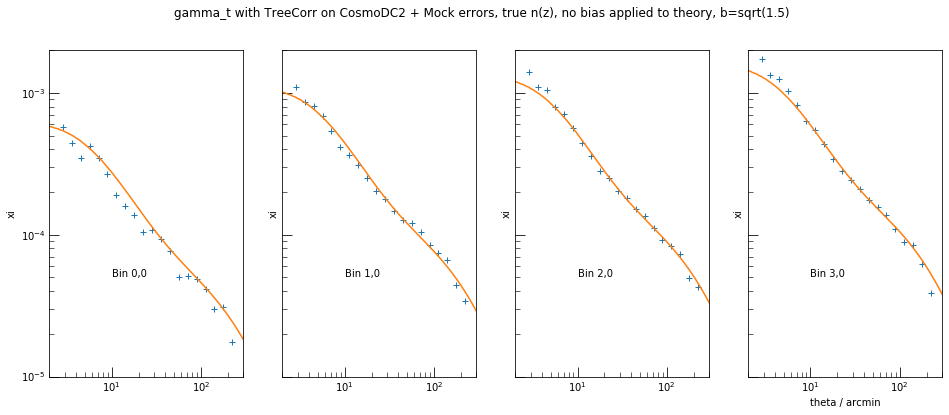

In [13]:
fig, axes = plt.subplots(nrows=nbin_lens, ncols=nbin_source, sharey=True, sharex=True, figsize=(16,6) ,squeeze=False)
for i in range(nbin_source):
    for j in range(nbin_lens):
        theta, xi = data2.get_theta_xi('galaxy_shearDensity_xi_t', f'source_{i}', f'lens_{j}')
        ax = axes[j,i]
        if len(theta)==0:
            fig.delaxes(ax)
            continue
        ax.loglog(theta, xi, '+')
        ax.loglog(theory_xi['theta'], 1.5**0.5 * theory_xi[(i, j, 1)])
        ax.text(10,5e-5, f'Bin {i},{j}')
        if i == nbin_source - 1:
            ax.set_xlabel("theta / arcmin")
        if j == 0:
            ax.set_ylabel("xi")        
        ax.tick_params(which='both', direction='in')
        ax.tick_params(which='major', length=10)
        ax.tick_params(which='minor', length=5)
ax.set_xlim(2.0, 300)
ax.set_ylim(1e-5, 2e-3)
# plt.tight_layout()
fig.suptitle("gamma_t with TreeCorr on CosmoDC2 + Mock errors, true n(z), no bias applied to theory, b=sqrt(1.5)")

Text(0.5, 0.98, 'wtheta with TreeCorr on CosmoDC2 + Mock errors, true n(z), b^2=1.5')

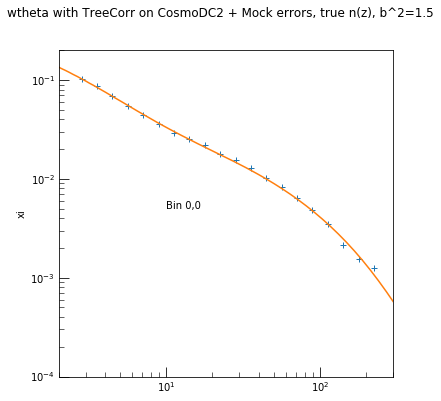

In [14]:
fig, axes = plt.subplots(nrows=nbin_lens, ncols=nbin_lens, sharey=True, sharex=True, figsize=(6,6) ,squeeze=False)
for i in range(nbin_lens):
    for j in range(nbin_lens):
        theta, xi = data2.get_theta_xi('galaxy_density_xi', f'lens_{i}', f'lens_{j}')
        ax = axes[j,i]
        if len(theta)==0:
            fig.delaxes(ax)
            continue
        ax.loglog(theta, xi, '+')
        ax.loglog(theory_xi['theta'], 1.5*theory_xi[(i, j, 2)])
        ax.text(10,5e-3, f'Bin {i},{j}')
        if i == nbin_source - 1:
            ax.set_xlabel("theta / arcmin")
        if j == 0:
            ax.set_ylabel("xi")        
        ax.tick_params(which='both', direction='in')
        ax.tick_params(which='major', length=10)
        ax.tick_params(which='minor', length=5)
ax.set_xlim(2.0, 300)
ax.set_ylim(1e-4, 2e-1)
# plt.tight_layout()
fig.suptitle("wtheta with TreeCorr on CosmoDC2 + Mock errors, true n(z), b^2=1.5")